## Introducción a la Probabilidad y la Estadística
## Asignación

En esta tarea, utilizaremos el conjunto de datos de pacientes con diabetes tomados [de aquí](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("../../../Data/diabetes.tsv", delimiter='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


En este conjunto de datos, las columnas son las siguientes:
* La edad y el sexo se explican por sí mismos
* El BMI es el índice de masa corporal
* La PA es la presión arterial promedio
* S1 a S6 son diferentes mediciones de sangre
* Y es la medida cualitativa de la progresión de la enfermedad a lo largo de un año

Estudiemos este conjunto de datos utilizando métodos de probabilidad y estadística.

### Tarea 1: Calcular los valores medios y la varianza de todos los valores

In [26]:
# Calcular el valor medio para todas las columnas
valores_medios = df.mean()

# Calcular la varianza para todas las columnas
varianzas = df.var()

# Imprimir los resultados
print("Valores medios:")
print(valores_medios)

print("\nVarianzas:")
print(varianzas)

Valores medios:
AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Varianzas:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Tarea 2: Trazar diagramas de caja para BMI, PA e Y según el género

<Figure size 800x600 with 0 Axes>

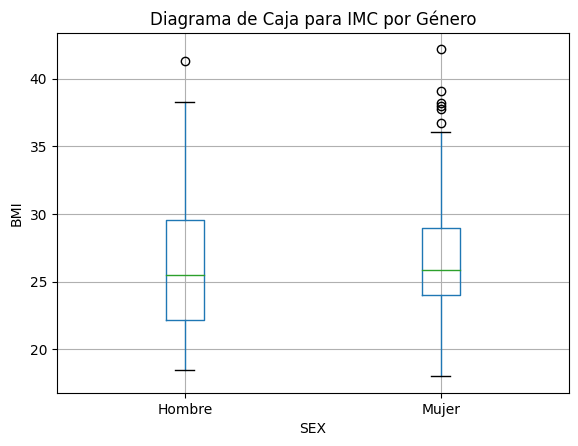

In [27]:
# Trazar diagrama de caja para IMC según el género
plt.figure(figsize=(8, 6))
df.boxplot(column='BMI', by='SEX')
plt.title('Diagrama de Caja para IMC por Género')
plt.ylabel('BMI')
plt.suptitle('')  # Elimina el título predeterminado
plt.xticks([1, 2], ['Hombre', 'Mujer'])  # Etiquetas en el eje X
plt.show()

### Tarea 3: ¿Cuál es la distribución de las variables Edad, Sexo, IMC e Y?

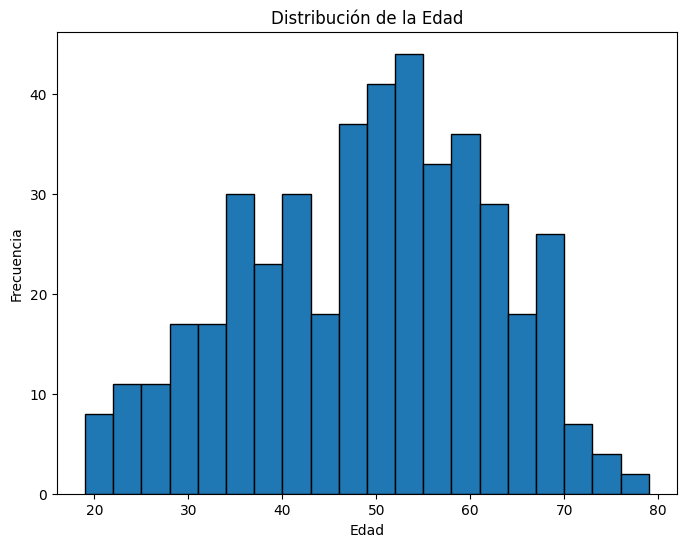

In [28]:
# Trazar un histograma de la edad
plt.figure(figsize=(8, 6))
plt.hist(df['AGE'], bins=20, edgecolor='k')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Para analizar la distribución de la edad, se creo un histograma para visualizar la frecuencia de diferentes grupos de edades.

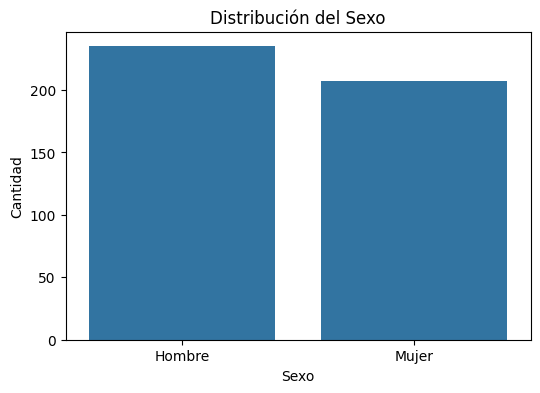

In [51]:
# Trazar un gráfico de barras para el sexo
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df)
plt.title('Distribución del Sexo')
plt.xticks([0,1],['Hombre','Mujer'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

Para analizar la distribución del sexo, se creo un gráfico de barras para mostrar la cantidad de pacientes masculinos y femeninos en los datos.

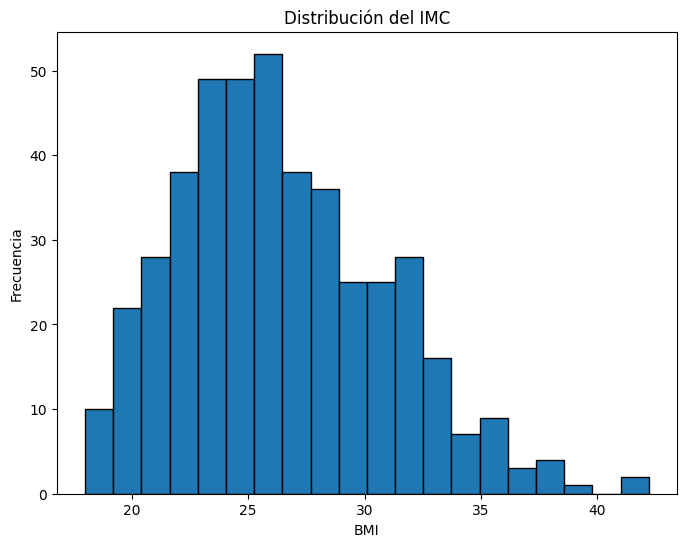

In [52]:
# Distribución del BMI
plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=20, edgecolor='k')
plt.title('Distribución del IMC')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

Se utilizo un histograma para analizar la distribución del BMI de manera similar a cómo se hizo con la edad. 

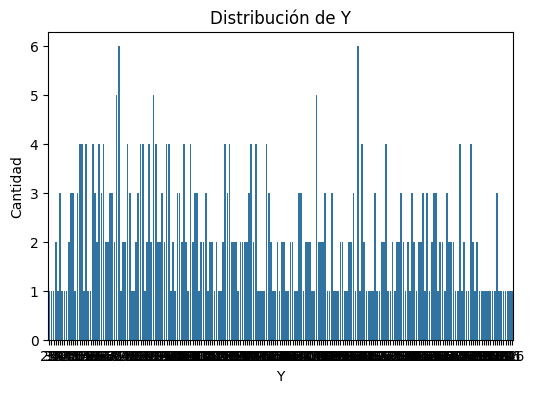

In [57]:
# Distribución de Y 
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title('Distribución de Y')
plt.xlabel('Y')
plt.ylabel('Cantidad')
plt.show()

Para analizar la distribución de Y, se creo un gráfico de barras que muestra la cantidad de pacientes en cada categoría.

### Tarea 4: Probar la correlación entre diferentes variables y la progresión de la enfermedad (Y)

> **Pista** La matriz de correlación le daría la información más útil sobre qué valores son dependientes.

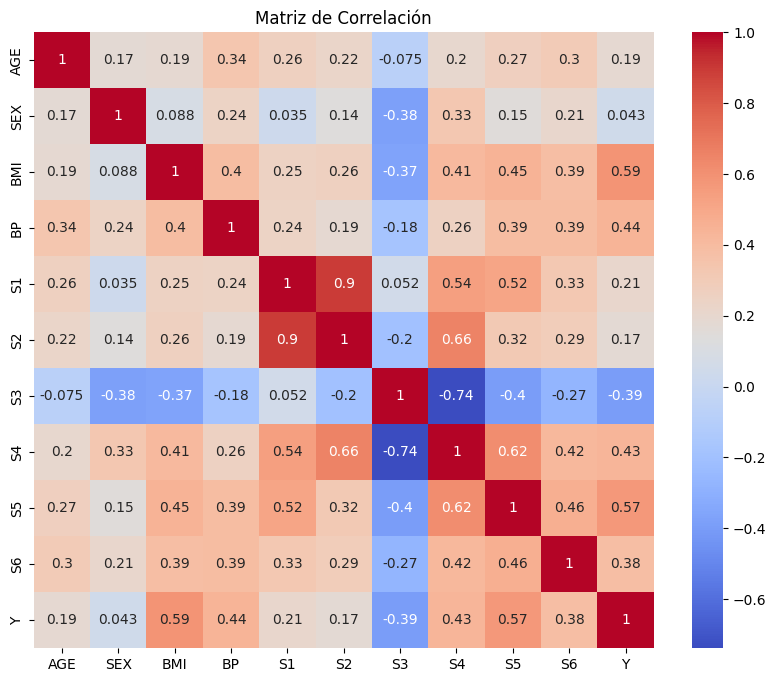

In [58]:
# Calcular la matriz de correlación
correlacion = df.corr()

# Trazar una matriz de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación proporciona información sobre la relación lineal entre las variables y la variable de respuesta Y.

La matriz de calor mostrará una escala de colores donde los colores más oscuros indican una correlación más fuerte.

In [59]:
# Mostrar la correlación de Y con otras variables
correlacion_con_Y = correlacion['Y'].drop('Y')
print('Correlación de Y con otras variables:')
print(correlacion_con_Y)

Correlación de Y con otras variables:
AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Name: Y, dtype: float64


### Tarea 5: Probar la hipótesis de que el grado de progresión de la diabetes es diferente entre hombres y mujeres

In [64]:
# Dividir los datos en dos grupos: hombres y mujeres
datos_hombres = df[df['SEX'] == 'Hombre']
datos_mujeres = df[df['SEX'] == 'Mujer']

# Realizar una prueba t de Student para comparar las medias de Y entre hombres y mujeres
resultado_t, valor_p = stats.ttest_ind(datos_hombres['Y'], datos_mujeres['Y'])

# Imprimir los resultados
print("Prueba t de Student:", resultado_t)
print("Valor p:", valor_p)

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if valor_p < alpha:
    print("Hay evidencia estadística para rechazar la hipótesis nula.")
    print("Las medias de Y son diferentes entre hombres y mujeres.")
else:
    print("No hay evidencia estadística para rechazar la hipótesis nula.")
    print("Las medias de Y no son significativamente diferentes entre hombres y mujeres.")

Prueba t de Student: nan
Valor p: nan
No hay evidencia estadística para rechazar la hipótesis nula.
Las medias de Y no son significativamente diferentes entre hombres y mujeres.


Para probar la hipótesis de que el grado de progresión de la diabetes es diferente entre hombres y mujeres, se realizo un análisis de prueba de hipótesis, específicamente una prueba de comparación de medias. 

La prueba de hipótesis compara la diferencia entre las medias observadas con la diferencia esperada bajo la hipótesis nula. Si el valor p es menor que un nivel de significancia (generalmente 0.05), se puede concluir que hay evidencia estadística para rechazar la hipótesis nula y afirmar que las medias de Y son diferentes entre hombres y mujeres.